# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE (5 pts)
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from six.moves import urllib # support URL download

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
DATA_PATH = os.path.join(".","assignment1")
os.makedirs(DATA_PATH, exist_ok= True)
DATA_URL = "https://raw.githubusercontent.com/MintForever/CS4774/master/insurance.csv"

def fetch_data(data_url = DATA_URL, data_path = DATA_PATH):
  csv_path = os.path.join(data_path, "cost.csv")
  urllib.request.urlretrieve(data_url, csv_path)

fetch_data()

def load_data(data_path = DATA_PATH):
  csv_path = os.path.join(data_path, "cost.csv")
  return pd.read_csv(csv_path)

data = load_data()
print(data.shape)
print(data.head())
data.info()
data.describe()


(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The data set is 73.3 KB, which is equivalent to 0.0733 MB.
There are 7 features and 1338 entries. 
It contains categorical data (sex, smoker and region).
There isn't any missing data because all columns have 1338 non-null data as shown above.
Some basic statistics about this data set: 
  there are three data types:float, integer, and strings.
  The sex, smoker and region variables are categories with a finite small number of values, and can be converted to integer representation instead of strings.
   The mean and standard deviation of all numerical values are as displayed above. Almost all numerical data have a relatively large scale, and therefore scaling is necessary in the data cleaning part to ensure better performance of the machine learning model.

---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING (25 pts)

**Data Discover:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

In [30]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
#!pip install -q sklearn.preprocessing
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit


# use stratified sampling to define train and test set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["smoker"]):
    train_data = data.loc[train_index]
    test_data = data.loc[test_index]


data1 = train_data.drop('charges', axis=1)
data1_labels  = train_data["charges"].copy()
data2 = test_data.drop('charges', axis=1)
data2_labels = test_data["charges"].copy()

#define train and test set
#train_set, test_set = train_test_split(data, test_size=0.2, random_state = 43)
#datacopy = train_set.copy()



# show correlation
corr_matrix = datacopy.corr()
print(corr_matrix["charges"].sort_values(ascending=False))
print(corr_matrix)





charges     1.000000
age         0.318804
bmi         0.208338
children    0.062199
Name: charges, dtype: float64
               age       bmi  children   charges
age       1.000000  0.119125  0.033562  0.318804
bmi       0.119125  1.000000  0.004195  0.208338
children  0.033562  0.004195  1.000000  0.062199
charges   0.318804  0.208338  0.062199  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c6cd7b390>,
      dtype=object)

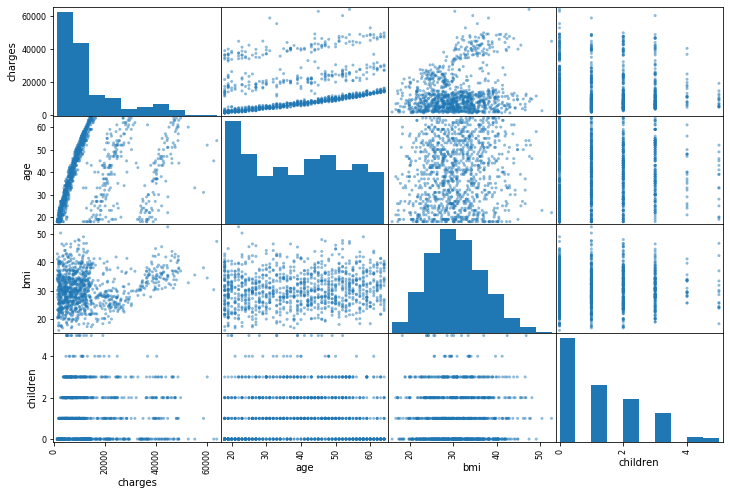

In [9]:
attributes = ["charges", "age", "bmi",
              "children"]
scatter_matrix(datacopy[attributes], figsize=(12, 8))


In [0]:

#create a data set of only numerical values
arr = ["sex","smoker","region"]
data_num = data1
for i in arr:
  data_num = data_num.drop(i,axis=1)


#create a pipeline to scale numerical data
num_pipeline = Pipeline([
                          ('std_scaler', StandardScaler()),
                          ])
data_num_tr = num_pipeline.fit_transform(data_num)


num_attribs= list(data_num)
cat_attribs=arr

full_pipeline = ColumnTransformer([
              ("num",num_pipeline, num_attribs),
              ("cat",OneHotEncoder(), cat_attribs)
                                   ])
data_prepared = full_pipeline.fit_transform(data1)

X_train = full_pipeline.fit_transform(data1)
y_train = data1_labels
X_test = full_pipeline.fit_transform(data2)
y_test = data2_labels


- - -
## Task 3. IMPLEMENT GRADIENT DESCENT (30 pts)
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [33]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation
import numpy as np

class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = 0; # parameter vector;
    self.alpha = 0.3; # learning rate
    self.cost  = 0; # cost function


  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations

    OUTPUT: 
    theta: updated value for theta
    cost: value of the cost function
    """
    # implementation code here
    m = X_train.shape[0]
    for iteration in range (0,iters):
      gradients = 2/m*X_train.T.dot(X_train.dot(theta)-y_train)
      theta = theta - alpha*gradients

    self.theta = theta
    xtheta = X_train.dot(self.theta)
    #self.cost = (xtheta).T.dot(xtheta)-2*(xtheta).T.dot(y_train)+(y_train).T.dot(y_train)
    self.cost = (1/m*(X_train.dot(self.theta)-y_train)**2).sum()
    return self.theta, self.cost


  def fitUsingGradientDescent(self, X_train, y_train, iters=200):
    """
    Train the regressor using gradient descent
    """
    # implementation code here
    X_b = np.c_[np.ones((len(X_train), 1)), X_train]
    y_train = y_train[:,np.newaxis]
    self.theta = np.random.randn(len(X_b[0]),1)
    self.theta, self.cost = self.gradientDescent(X_b, y_train, self.theta, self.alpha,iters)
    return self.cost

  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    # implementation code here for Task 4.
    m = len(X_train)
    X_b = np.c_[np.ones((len(X_train), 1)), X_train]  # add x0 = 1 to each instance
    y_train = y_train[:,np.newaxis]
    self.theta = np.linalg.pinv(X_b).dot(y_train)
    self.cost = (1/m*(X_b.dot(self.theta)-y_train)**2).sum()
    return self.cost


  def predict(self, X_test):
    """
    Predicting the label
    """
    # implementation code here 
    X_test = np.c_[np.ones((len(X_test),1)),X_test]
    y_predict= X_test.dot(self.theta)
    return y_predict

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    return("Parameter vector is %f" % self.theta)   
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
X_train = data_prepared
y_train = data1_labels
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)
#print(myGradientDescentModel)


37882207.21247708

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

Text(0.5, 1.0, 'Error vs. Training Iterations')

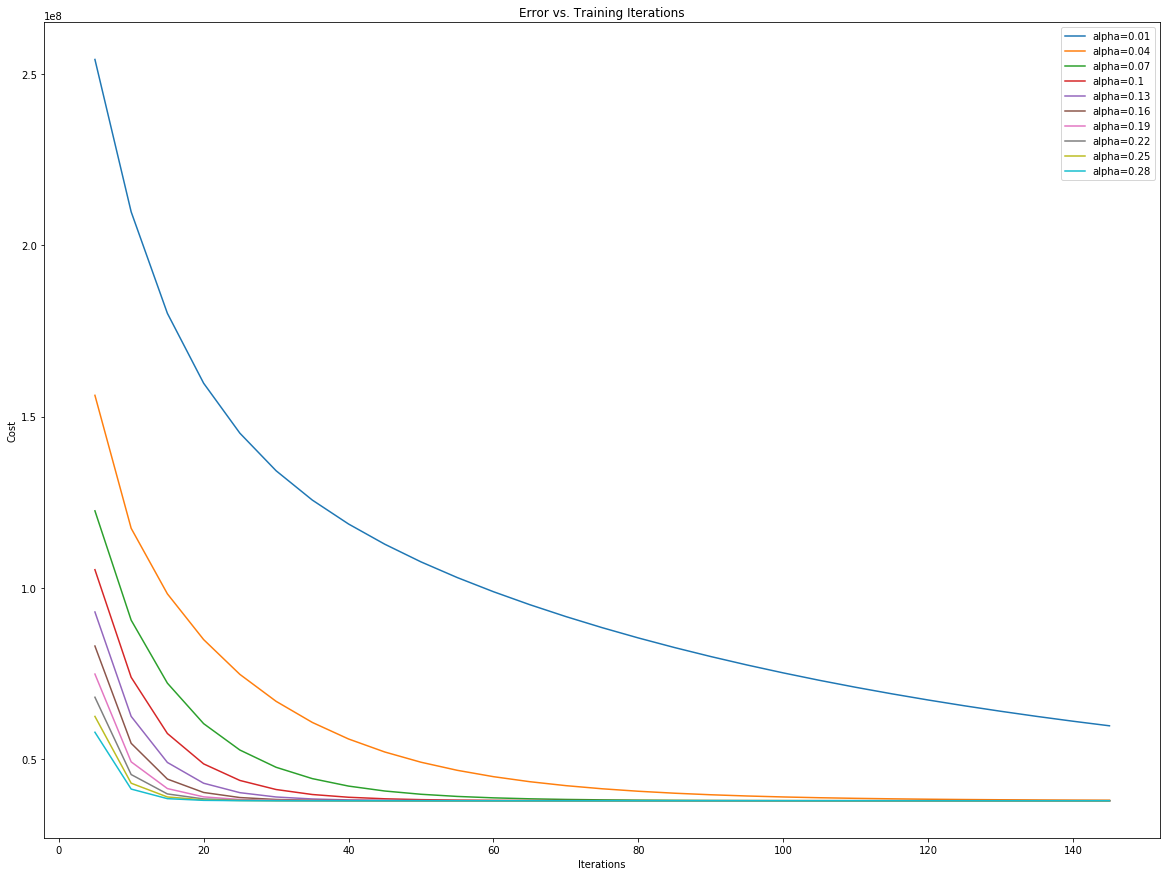

In [34]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.
#

plt.figure(figsize=(20, 15))
iters = list(range(5,150,5))
legend=[]

for i in range (1,30,3):
  myGradientDescentModel.alpha = i/100
  costs = []
  for j in iters:
    costs.append(myGradientDescentModel.fitUsingGradientDescent(X_train, y_train,j))
  plt.plot(iters,costs)
  legend.append("alpha="+str(i/100))

plt.legend(legend)
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  


The graph shows the larger the alpha value, the quicker the cost function decays to a small value. In my example, alpha = 0.28 is the best value. However, alpha cannot be infintely big. Once it exceeds 1, the cost function will not converge properly.

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION (10 pts)

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [35]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

37882230.78027389

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS (20 pts)

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you may also use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [36]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print("SGD:",mySGDModel_rmse)

def test(model, X_train, y_train, X_test, y_test):
  if (model == "gradient descent"):
    myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)
    y_predict = myGradientDescentModel.predict(X_test)
    myGD_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
    print("my gradient descent: ",mySGDModel_rmse)
  else:
    myGradientDescentModel.fitUsingNormalEquation(X_train, y_train)
    y_predict = myGradientDescentModel.predict(X_test)
    mynormal_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
    print("my normal equation:",mynormal_rmse)

test("gradient descent",X_train, y_train, X_test, y_test)
test("normal",X_train, y_train, X_test, y_test)


SGD: 5589.0486542888475
my gradient descent:  5589.0486542888475
my normal equation: 5590.374692006575


My gradient descent model does slightly better than my normal equation model, and the rmse values I got from both of my models matxh with the value calculated from the built-in SGD model. The standard deviation of the charges was calculated to be 12110 previously. Since the rmse value is less than half of one standard deviation, the error is pretty good.

- - -
## Task 6. PRESENT YOUR SOLUTION (10 pts)

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

Since the rmse of my model is less than half of one standard deviation of the provided charges data, this model is considered to be pretty successful at predicting medical costs. 

Three different models have been used to develop an algorithm to predict the medical costs. In conclusion, batch gradient descent, scholastic gradient descent and normal equation are equally as good if the number of iterations and learning rate alpha are well chosen. 

Regarding splitting the training and testing data, I've tried to do a random split as well as a stratified sampling with "sex" and "smoker" as the decision factor. After running the model on these three situations, I figured that the model trained using "smoker" stratified sampling yielded the smallest rmse value, meaning that being a smoker or not affects the charges generated relatively more significantly. Ohter than that, the table of correlation shows that the highest correlation between any numerical data and the charges generated is 0.31, indicating that there is not any factor that is particularly influential to the cost prediction. 

I've learned that plotting the cost against iterations with various learning rate can help me to determine the best alpha value as well as the minimum number of iteration needed for cost to converge. I've also learned that it ls better to train the data using at least two different models to confirm the accuracy of result. 

Some insight: since the correlation between variables are small, non-linear models might have better performances than the linear models we use. 

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!